## Genetic Algorithm - Entity 0001
**Author:** `Phatdev`, `Le Thanh Phuc`.

## Problem 01

Find a, b, c, d for **a + 2\*b + 3\*c + 4\*d = S**
Example: S = 60

## IDEA
**1:** Use backtracking to find all possible values of a, b, c, d. (Basic solution)

**2:** Use **Genetic Algorithm** to find the best values of a, b, c, d.

In [18]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Import libraries

In [1]:
import random
import math

In [19]:
import matplotlib.pyplot as plt

We will initialize a chromosomes list with chromosome is a list of 4 values [a, b, c, d].

So we have a chromosomes list look like this: `[[a1, b1, c1, d1], [a2, b2, c2, d2], ..., [an, bn, cn, dn]]`.

Example with n = 10: `[a1, b1, c1, d1], [a2, b2, c2, d2], [a3, b3, c3, d3], [a4, b4, c4, d4], ..., [a9, b9, c9, d9], [a10, b10, c10, d10]`.

In [7]:
chromosomes = [[random.randint(1, 60) for i in range(4)] for j in range(10)]

In [5]:
chromosomes

[[39, 39, 54, 56],
 [20, 23, 7, 42],
 [54, 44, 45, 37],
 [25, 13, 36, 57],
 [9, 60, 55, 16],
 [45, 57, 17, 3],
 [39, 28, 6, 22],
 [3, 21, 50, 38],
 [37, 5, 24, 6],
 [38, 1, 9, 51]]

### Re-transform expressions

**First expression:** `a + 2*b + 3*c + 4*d = S`.

We are going to transform `a + 2*b + 3*c + 4*d = S` to `abs((a + 2*b + 3*c + 4*d) - S) = 0`.

So after re-transforming, we have `abs((a + 2*b + 3*c + 4*d) - S) = 0`. Let's write a function to calculate value of this expression.
For example:

```python
def calculate(a, b, c, d, S):
    return abs((a + 2*b + 3*c + 4*d) - S)
```

But in this problem we will transform `a, b, c, d` into a chromosome list with 4 genes. So we need to modify the function above to calculate the value of the expression with a chromosome list.

```python
def calculate(chromosome, S):
    return abs((chromosome[0] + 2*chromosome[1] + 3*chromosome[2] + 4*chromosome[3]) - S)
```

In the next step, we will define the calculate function in this notebook.

In [6]:
def calculate(chromosome, S):
    return (abs(chromosome[0] + 2*chromosome[1] + 3*chromosome[2] + 4*chromosome[3] - S))

Calculate the fitness of a chromosome is the value of the expression above. The smaller the value, the better the chromosome.

In [9]:
fs = [calculate(chromosome, 60) for chromosome in chromosomes]
fitness = [1/(1 + f) for f in fs]

In [10]:
fitness

[0.003003003003003003,
 0.002570694087403599,
 0.003355704697986577,
 0.004310344827586207,
 0.0056179775280898875,
 0.0024449877750611247,
 0.16666666666666666,
 0.002352941176470588,
 0.0035087719298245615,
 0.0034602076124567475]

Calculate total fitness of all chromosomes in the chromosomes list.

In [12]:
totalFitness = sum(fitness)

Calculate percentage of each chromosome in the chromosomes list.

In [14]:
percentage = [f/totalFitness for f in fitness]
prefixPercentage = [sum(percentage[:i+1]) for i in range(len(percentage))]

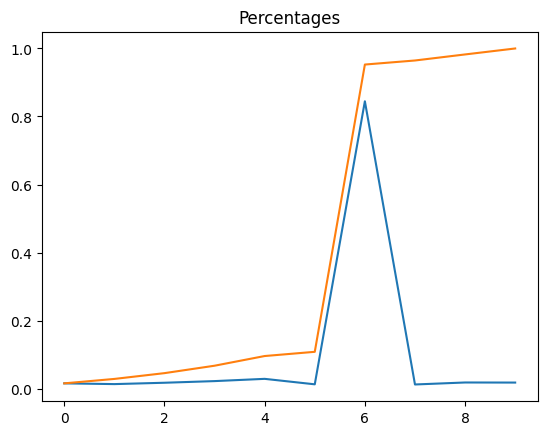

In [31]:
plt.title("Percentages")
plt.plot(percentage)
plt.plot(prefixPercentage)


Random percentage of each chromosome in the chromosomes list.

In [32]:
randomPercentage = [random.random() for i in range(10)]

In [33]:
randomPercentage

[0.7788806656370093,
 0.5186900210849833,
 0.04004054457140993,
 0.18912674477467917,
 0.8064145966152084,
 0.8291362570670874,
 0.2265783073429214,
 0.17109197403133725,
 0.2300968470417627,
 0.440923671054555]

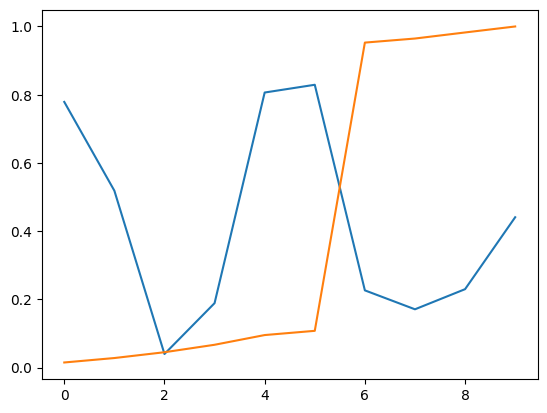

In [35]:
plt.plot(randomPercentage)
plt.plot(prefixPercentage)

Create a new chromosomes list with original each chromosome list in the chromosomes list with 4 genes and the value of genes is 0.

In [36]:
newChromosomes = [[0, 0, 0, 0] for i in range(10)]

Check the elements in the chromosomes list. If the percentage of randomPercentage is within the range of the percentage of the chromosome, we will add the chromosome to the new chromosomes list.

In [37]:
for i in range(10):
    for j in range(10):
        if randomPercentage[i] < prefixPercentage[j]:
            newChromosomes[i] = chromosomes[j]
            break

In [40]:
chromosomes, newChromosomes

([[11, 55, 33, 43],
  [55, 55, 53, 31],
  [44, 50, 23, 36],
  [34, 44, 15, 31],
  [3, 49, 16, 22],
  [48, 58, 28, 55],
  [18, 5, 5, 3],
  [57, 44, 53, 45],
  [23, 38, 39, 32],
  [47, 36, 35, 31]],
 [[18, 5, 5, 3],
  [18, 5, 5, 3],
  [44, 50, 23, 36],
  [18, 5, 5, 3],
  [18, 5, 5, 3],
  [18, 5, 5, 3],
  [18, 5, 5, 3],
  [18, 5, 5, 3],
  [18, 5, 5, 3],
  [18, 5, 5, 3]])

Create crossover rate.

In [41]:
crossoverRate = [random.random() for i in range(10)]

In [44]:
rate = 0.25

Create selection chromosome from new chromosomes list.
So we will selection chromosome which crossover rate under 0.25.


In [1]:
# create selection of chromosomes
selection = []

In [3]:
# temp selection of chromosomes
tempSelection = selection

Croossover the selected chromosomes. With crossover point is 1 -> n-1.

In [ ]:
for i in range(0, len(selection)-1):
    for j in range(i+1, len(selection)):
        crossoverRate = random.randint(0, 3)
        newChromosome = selection[i][:crossoverRate] + selection[j][crossoverRate:]
        